# 波士頓房價預測

### 參考資料:https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
from sklearn.model_selection import train_test_split #分訓練和測試的資料
from sklearn.linear_model import LinearRegression #建函數學習機
from sklearn.datasets import load_boston #房價data
import seaborn as sns

In [19]:
boston_dataset = load_boston()

In [20]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [22]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
#the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.
boston['MEDV'] = boston_dataset.target

In [24]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 分析"CHAS"~"RAD"

In [43]:
X = boston.loc[:, "CHAS":"RAD"].values
Y = boston.MEDV

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [65]:
len(x_train)

354

In [66]:
len(x_test)

152

In [67]:
#數據分析
model = LinearRegression()

In [68]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_predict = model.predict(x_test)

In [70]:
sns.set()

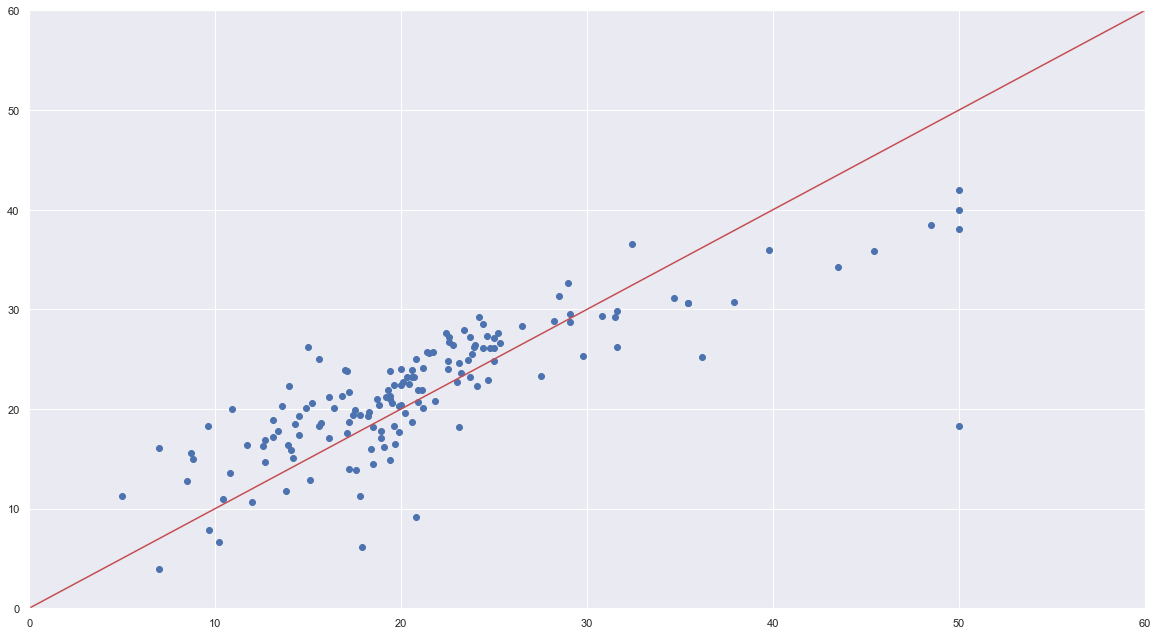

In [74]:
plt.scatter(y_test, y_predict)
plt.xlim(0,60)
plt.ylim(0,60)
plt.plot([0,60],[0,60],'r')

### 分析"NOX"~"LSTAT"

In [78]:
X0 = boston.loc[:, "NOX":"LSTAT"].values
Y0 = boston.MEDV

In [79]:
x0_train,x0_test,y0_train,y0_test = train_test_split(X0,Y0,test_size=0.3,random_state=42)

In [80]:
model0 = LinearRegression()

In [83]:
model.fit(x0_train,y0_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y0_predict = model.predict(x0_test)

### plot color:https://matplotlib.org/3.1.1/tutorials/colors/colors.html

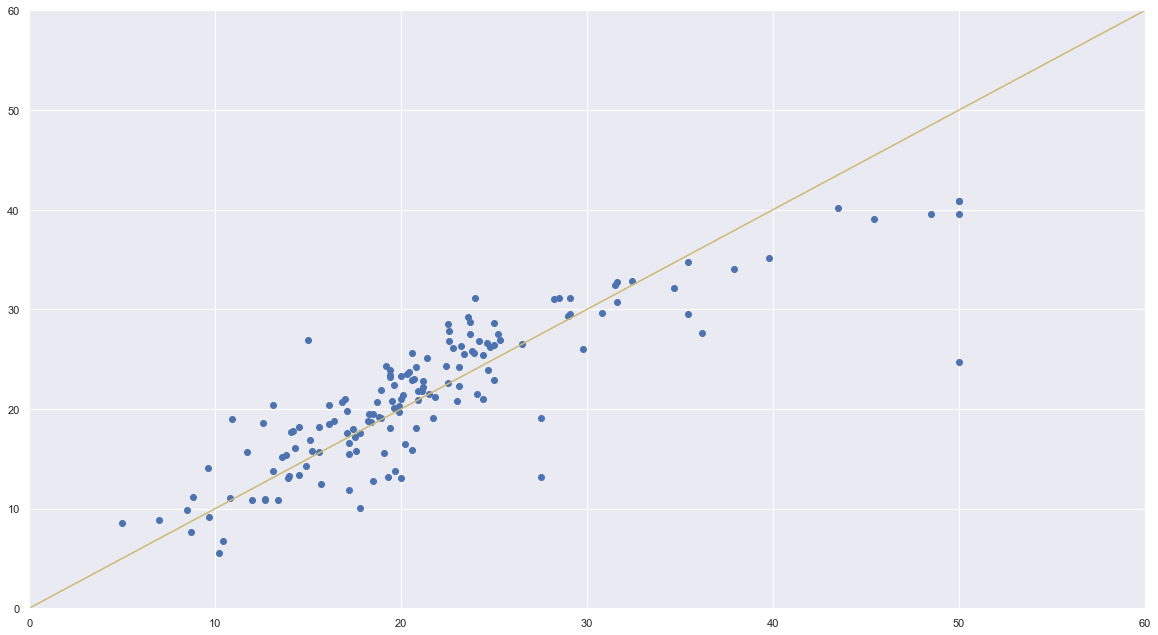

In [94]:
plt.scatter(y0_test, y0_predict)
plt.xlim(0,60)
plt.ylim(0,60)
plt.plot([0,60],[0,60],'y')#color:'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'

In [ ]:
# correlation of the features with each other and with the target

In [75]:
correlation_matrix = boston.corr().round(2)

### heatmap color:https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

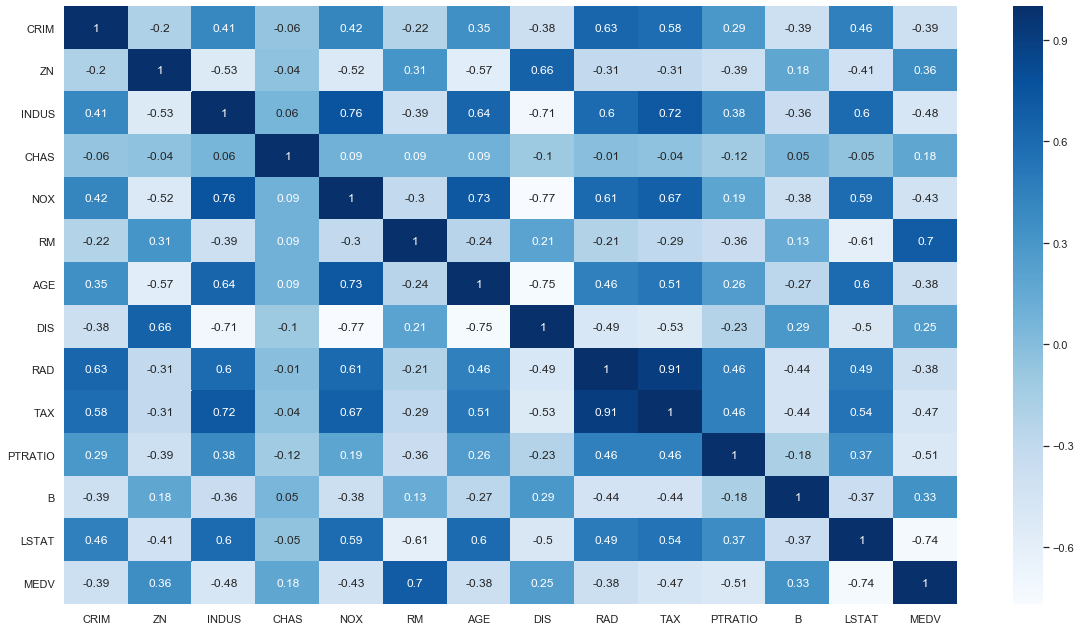

In [95]:
sns.set(rc={'figure.figsize':(20,11)})
sns.heatmap(correlation_matrix,annot=True, cmap="Blues")